# The Python numpy.random package

The Python numpy.random ....

- Explain the overall purpose of the package.
- Explain the use of the “Simple random data” and “Permutations” functions.
- Explain the use and purpose of at least five “Distributions” functions.
- Explain the use of seeds in generating pseudorandom numbers. 

## The Purpose of the package

The purpose of a random number generator is to generate a number or sequence of numbers that cannot be reasonably predicted better than that by random chance. 

Random number generators have applications in gambling, statistical sampling, computer simulations, cryptography and randomised experimental design.

The earliest methods of random number generators were dice, spinners, wheel of fortune, roulette, etc., cards, drawing straws, tea leaves, flipping coins, pulling from a set of items in a bag, hat, etc.

The general purpose of the numpy.random package is to generate various types and distributions of datasets that can be used in development and evaluation and used in the exploration of various libraries and analytical methods. It provides the developer with a clear understanding of the dataset prior to analysis, to explore analytical methods and derive the very variables initially used to create a dataset and deduce them again from the dataset using analyses and analytical methods and libraries. 


## Simple Random data and permutations

The sample random data functions generate sequences of random numbers without considering any criteria, like distribution. 

Permutations acts upon a dataset in one of two fashions, it shuffles the dataset by acting upon it directly or by creating a shuffled copy of the set using the permutation function.

One practical real world use case would be that of simulating the roll of a six sided dice thousands of times as illustrated below.

In [1]:
import numpy.random as rnd
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

def diceroll ():
    import numpy.random as rnd
    dice=['one','two','three','four','five','six']
    return rnd.choice(dice)


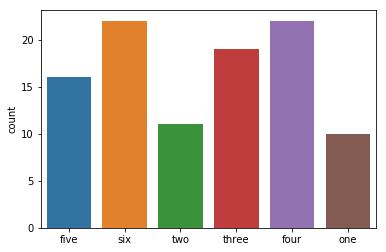

In [2]:
dicerolls=[diceroll() for i in range(100)]
sns.countplot(dicerolls)
pl.show()

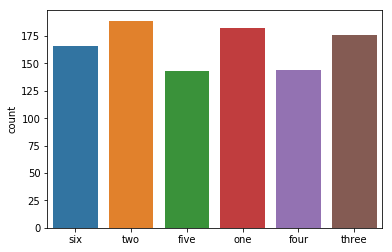

In [3]:
dicerolls=[diceroll() for i in range(1000)]
sns.countplot(dicerolls)
pl.show()

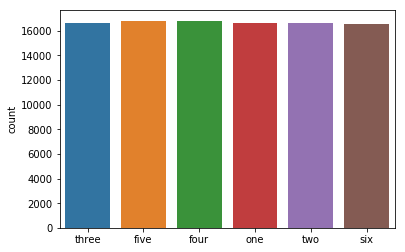

In [4]:
dicerolls=[diceroll() for i in range(100000)]
sns.countplot(dicerolls)
pl.show()

The numpy.random.choice function is used to randomly select one of the six sides of the dice and then to run this process through thousands of cycles to test the distribution for the randomness of the function.

The really interesting observation of a very simple experiment like this immediately shows the impact of the statistical sample and the corresponding differences in the distributions. With really big test samples the statistical differences becomes negligible. 

## Permutations

Permutations can be illustrated on the dice object illustrated in the exercise above.

In [56]:
dice=['one','two','three','four','five','six']
dice

['one', 'two', 'three', 'four', 'five', 'six']

The dice object appears in the fixed sequence it was created in previously.

In [6]:
rnd.permutation(dice)

array(['six', 'four', 'two', 'one', 'three', 'five'], dtype='<U5')

In [7]:
dice

['one', 'two', 'three', 'four', 'five', 'six']

So the permutation of dice create a new permuted sequence, but the original object dice remains intact.

Now we run shuffle on the same object dice.

In [8]:
 rnd.shuffle(dice)
 print(dice)

['six', 'three', 'two', 'four', 'one', 'five']


Now the dice object content was permanently shuffled to be in a new random order.

## The use of distributions

### Laplace Distribution

<img style="float: left; margin: 0px 15px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Pierre-Simon-Laplace_%281749-1827%29.jpg" alt="Piere Laplace" title="Piere Laplace" />The Laplace distribution was named after Pierre-Simon Laplace who was a prominent French mathematical physicist and astronomer of the 19th century, who made crucial contributions in the arena of planetary motion by applying Sir Isaac Newton’s theory of gravitation to the entire solar system. His work regarding the theory of probability and statistics is considered pioneering and has influenced a whole new generation of mathematicians.

The Laplace distribution is similar to the Gaussian/normal distribution, but is sharper at the peak and has fatter tails. It represents the difference between two independent, identically distributed exponential random variables.

The normal distribution sometimes also referred to as the Gaussian distribution recognisable by the distinctive bell shape. A distinguishing feature of the Laplace distribution is its tails, which are fatter than the normal distribution’s. 

The Laplace distribution (given after the name of Pierre-Laplace) is a distribution which again like the t-distribution can be used for robustness to outliers due to fatter tails. It is also called double exponential distribution due to being made up from 2 exponential functions. What is interesting about it is that it is quite similar to the Gaussian. Instead of mean (μ) and standard deviation (σ), Laplace has location (also μ) and diversity (b).


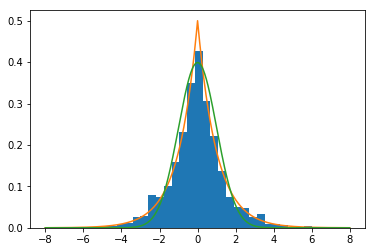

In [4]:
import numpy.random as rnd
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline

loc, scale = 0., 1. # set location and diversity
s = rnd.laplace(loc, scale, 1000) # generate a random set 
count, bins, ignored = pl.hist(s, 30, density=True)

x = np.arange(-8., 8., .01) # creat a list of x values
pdf = np.exp(-abs(x-loc)/scale)/(2.*scale) #pdf - probability density function
pl.plot(x, pdf)
#gausian for comparisom in green
g = (1/(scale * np.sqrt(2 * np.pi)) *np.exp(-(x - loc)**2 / (2 * scale**2)))
pl.plot(x,g)
#pl.show()

### Binomial Distribution

Selecting a binomial for distribution for discussion was supposed to be easy, however the library function outputs required some more code to convert the outputs into data values useful in a plot. Also tweaking the parameters is not that trivial to produce a very binomial looking dataset, it more closely resembles a normal or Gaussian distribution until a sufficiently big dataset was produced to shift everything to the left.

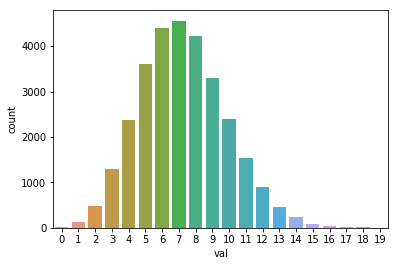

In [20]:
import collections                         # for counting the 30k cycle results 
import matplotlib.pyplot as pl             # 
import numpy.random as rnd                 # 
import seaborn as sns                      #
import pandas as pd                        # 
%matplotlib inline                         # 

a=np.random.binomial(99, 0.073, 30000)     # generate a binomial distribution with a 7.3% probability over 99 tests
b=collections.Counter(a)                   # count the number of occurances of the values generated in a over 30k cycles
c=b.most_common()                          # sort by most common and create a list for use in graph
df=pd.DataFrame(c,columns=['val','count']) # convet the list to a dataframe for ease of use with seaborn with labels etc
sns.barplot('val','count',data=df)         # generate the plot
pl.show()

Having being forced in a way to work through the logic of generating the plot and generating appropriate data to do so, resulted in a deeper understanding of the fundamentals behind the graph and graph data by playing around with the random.binomial parameters.

rnd.binomial(n, p, size=None)

n trials and 
p probability
size 

### Expenential Distribution

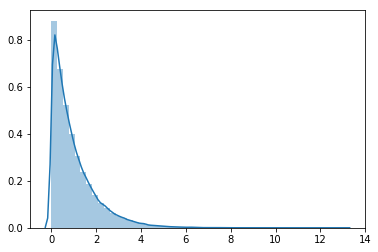

In [5]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

e=np.random.exponential(1,100000)
sns.distplot(e)

### Log Distribution

Again the expectation was to generate a dataset using the __np.randowm.lognormal__ function and and simply plot the data output.

When generating a bunch of numbers and sorting them by size it follows a logarithmic curve one would expect to get but getting a log distribution graph, resembling what is shown in the literature, takes a very different approach even in the python random log distribution documentation discussion.

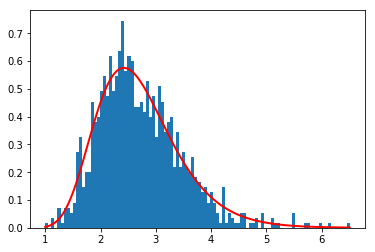

In [6]:
# Generate a thousand samples: each is the product of 100 random
# values, drawn from a normal distribution.

import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

b = []
for i in range(1000): # generate a set of 1000 really big random numbers 1.0475083199045841e+102
    a = 10. + np.random.random(100)
    b.append(np.product(a))

b = np.array(b) / np.min(b) # scale values to range 0-2 roughly, so bigger than 0 and smaller than 2
count, bins, ignored = pl.hist(b, 100, density=True, align='mid') # create a histogram plot and save the conts and bins values
sigma = np.std(np.log(b)) # generate the log values of the array b and then calculate the standard deviation of the set
mu = np.mean(np.log(b)) # generate the log mean of the set

x = np.linspace(min(bins), max(bins), 10000) # generate evenly spaced number for the x-axis of the graph
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) # calculate the probability density function
        / (x * sigma * np.sqrt(2 * np.pi)))

pl.plot(x, pdf, color='r', linewidth=2) # plot the pdf in red over the histogram
pl.show()

### Student-t Distribution

The distinguishing feature of the t-distribution are its tails, which are fatter than the normal distribution’s. If the fat-tail anecdote isn’t a hot enough take to wow your neighbor, go to its mildly-interesting back-story concerning beer. 

Over 100 years ago, Guinness was using statistics to make better stout. There, William Sealy Gosset developed some whole new stats theory just to grow better barley. Gosset convinced the boss that the other brewers couldn’t figure out how to use the ideas, and so got permission to publish, but only under the pen name “Student”. Gosset’s best-known result is this t-distribution, which is sort of named after him. 
 
It is like the Gaussian distribution. Easy to remember - think 't'  for fatter tails; a Gaussian with fatter tails. It is a probability  distribution that is used to estimate population parameters when the  sample size is small and/or when the population variance is unknown.  Plus, it keeps outliers in mind too. Thereby, is more robust than the  Gaussian distribution. The t-distribution's properties start to resemble  the Gaussian when the degrees of freedom are high.

### Ziph Distribution

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation. For example, in the Brown Corpus of American English text, the word the is the most frequently occurring word, and by itself accounts for nearly 7% of all word occurrences (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word of accounts for slightly over 3.5% of words (36,411 occurrences), followed by and (28,852). Only 135 vocabulary items are needed to account for half the Brown Corpus.

So instead of generating random data, a more interesting approach was considered by generating a Ziph dataset from the book __[Ulyses by the James Joyce](data/ulyses_by_james_joyce.txt)__ from first principle. 

In [2]:
import seaborn as sns
from collections import Counter as counter
import matplotlib.pyplot as pl
import pandas as pd
%matplotlib inline

### Generating a wordlist

So the text from the book is read into a word list line by line, parsed into individual words and stripped of all spaces, punctuation and case.

In [3]:
wordlist=[]
with open('data/ulyses_by_james_joyce.txt', 'r', encoding='utf-8') as infile:
    for line in infile:
        words=line.strip().split()
        for word in words:
            wordlist.append(word.casefold().strip('[,:.]'))

The resulting word list is then counted and a complete list of counted word generated for the entire book.

In [7]:
wordcount=counter(wordlist)
print('{:,}'.format(len(wordcount)))


34,986


The result is almost 35 thousand unique words that is then sorted by the top most common ones and arranged in a data frame for display and easy graphing purposes.

In [8]:
most_common=wordcount.most_common(15)

The most common word and count of the words are then assembled in a data frame __df__.

In [10]:
words=[];counts=[]

for word,count in most_common:
    words.append(word); counts.append(count)
df=pd.DataFrame({'words': words,'counts': counts});df

,words,counts
0,the,14888
1,of,8244
2,and,7198
3,a,6442
4,to,4983
5,in,4887
6,he,3752
7,his,3292
8,i,2527
9,that,2523


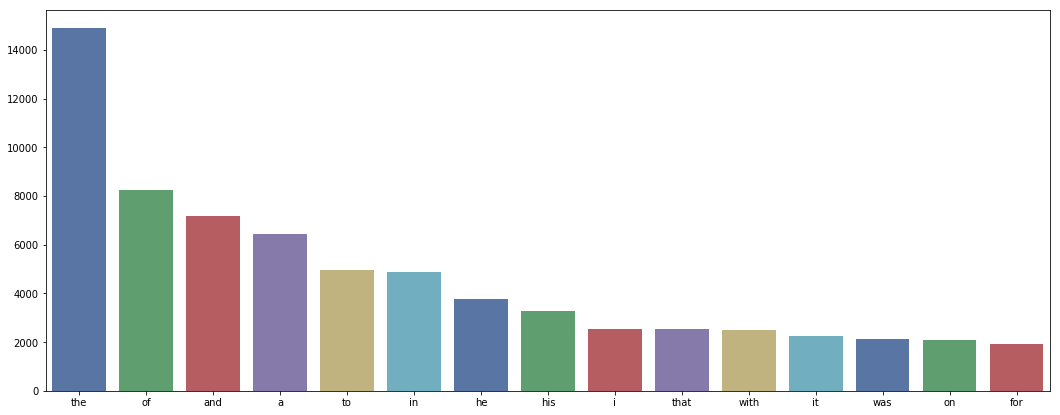

In [21]:
pl_size = (18, 7) # set the graph size
fig, ax = pl.subplots(figsize=pl_size)
sns.barplot(ax=ax,x=words,y=counts, palette="deep", data=df)
pl.show()

Although not a perfect Ziphian distribution from the third term onward, it follows the pattern of most such distributions typically derived on smaller datasets.


## References

1. __[Numpy reference manual - numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)__
1. __[Cosmo Learning Video - Lecture 18 - Python Random Numbers](https://cosmolearning.org/video-lectures/python-random-number-generator-random-module/)__
1. __[rando.Random vs numpy.Random](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python)__
1. __[Quora - The most interesting probability distributions](https://www.quora.com/What-are-some-of-the-most-interesting-probability-distributions)__
1. __[HDIP Probabbility Distributions Summary](http://hdip-data-analytics.com/statistics/distributions)__
1. __[Common Probability Distributions](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)__
1. __[Random Number Generators - University Libraries - Ball State University](lib.bsu.edu/beneficencepress/mathexchange/09-01/randomnumbergenerators.pdf)__
1. __[R. Davies, Hardware random number generators](http://www.robertnz.net/hwrng.htm)__
1. __[A Brief History of Random Numbers](https://medium.freecodecamp.org/a-brief-history-of-random-numbers-9498737f5b6c)__
1. __[Biography1 - Laplace](https://www.britannica.com/biography/Pierre-Simon-marquis-de-Laplace)__
1. __[Biography2 - Laplace](http://www-groups.dcs.st-and.ac.uk/history/Biographies/Laplace.html)__
1. __[Famous Scientists - Laplace](https://www.famousscientists.org/pierre-simon-laplace/)__
1. __[]()__